In [1]:
import numpy as np
import pandas as pd
import seaborn as sns  
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
sns.set(color_codes=True)
from   scipy.stats import ttest_1samp, ttest_ind ,chi2_contingency,chi2,normaltest
df1=pd.read_csv("Wholesale Customer.csv")
df2=pd.read_csv("Survey-1.csv")
df3=pd.read_csv("A & B shingles-1.csv")

# Problem 1

## A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

### 1.1 Use methods of descriptive statistics to summarize data. Which Region and which Channel spent the most? Which Region and which Channel spent the least?

### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? 

### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

### 1.4 Are there any outliers in the data? 

### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? 

# 1.1 Use methods of descriptive statistics to summarize data.

In [2]:
df1.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


In [4]:
df1.size

3960

In [5]:
print ("Do dataset has any na values? " , df1.isnull().values.any())

Do dataset has any na values?  False


In [6]:
df1.describe()

,Buyer/Spender,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,220.500000,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,127.161315,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,110.750000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,220.500000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,330.250000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,440.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [7]:
df1["Channel"].unique()

array(['Retail', 'Hotel'], dtype=object)

In [8]:
df1["Region"].unique()

array(['Other', 'Lisbon', 'Oporto'], dtype=object)

In [9]:
adf=df1.drop(columns=['Buyer/Spender'])
adf.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,Retail,Other,12669,9656,7561,214,2674,1338
1,Retail,Other,7057,9810,9568,1762,3293,1776
2,Retail,Other,6353,8808,7684,2405,3516,7844
3,Hotel,Other,13265,1196,4221,6404,507,1788
4,Retail,Other,22615,5410,7198,3915,1777,5185


In [10]:
spent=adf.groupby(["Region","Channel"]).sum()
spent

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
Lisbon Hotel     761233   228342   237542  184512             56081   
       Retail     93600   194112   332495   46514            148055   
Oporto Hotel     326215    64519   123074  160861             13516   
       Retail    138506   174625   310200   29271            159795   
Other  Hotel    2928269   735753   820101  771606            165990   
       Retail   1032308  1153006  1675150  158886            724420   

                Delicatessen  
Region Channel                
Lisbon Hotel           70632  
       Retail          33695  
Oporto Hotel           30965  
       Retail          23541  
Other  Hotel          320358  
       Retail         191752

In [11]:
spent["Total_Expenditure"]=spent.sum(axis=1)
spent

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Region Channel                                                        
Lisbon Hotel     761233   228342   237542  184512             56081   
       Retail     93600   194112   332495   46514            148055   
Oporto Hotel     326215    64519   123074  160861             13516   
       Retail    138506   174625   310200   29271            159795   
Other  Hotel    2928269   735753   820101  771606            165990   
       Retail   1032308  1153006  1675150  158886            724420   

                Delicatessen  Total_Expenditure  
Region Channel                                   
Lisbon Hotel           70632            1538342  
       Retail          33695             848471  
Oporto Hotel           30965             719150  
       Retail          23541             835938  
Other  Hotel          320358            5742077  
       Retail         191752            4935522

# Which Region and which Channel spent the most?

In [12]:
spent['Total_Expenditure'].loc[(spent['Total_Expenditure']==max(spent['Total_Expenditure']))]

Region  Channel
Other   Hotel      5742077
Name: Total_Expenditure, dtype: int64

# Which Region and which Channel spent the least?

In [13]:
spent['Total_Expenditure'].loc[(spent['Total_Expenditure']==min(spent['Total_Expenditure']))]

Region  Channel
Oporto  Hotel      719150
Name: Total_Expenditure, dtype: int64

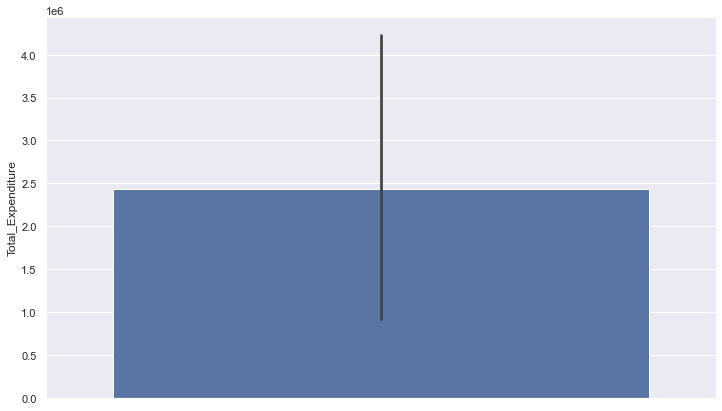

In [14]:
plt.figure(figsize=(12,7))
x=sns.barplot(y='Total_Expenditure',data=spent)


## I am trying to enter X=spent.index but its not eecuting in the notebook not sure why!!

### Code
#### plt.figure(figsize=(12,7))
#### x=sns.barplot(x=spent.index,y='Total_Expenditure',data=spent)
#### for height in x.patches:
####    if height.get_height() == max(spent['Total_Expenditure']) :
####        height.set_color('green')
####    elif height.get_height() == min(spent['Total_Expenditure']) :
####          height.set_color('green') 
####    else:
####        height.set_color('grey')
#### plt.xlabel('Region and Channel ')
#### x.set_xticklabels(x.get_xmajorticklabels(), fontsize = 12)

#### red_patch = mpatches.Patch(color='red', label='Region and channel which spent the most ')
#### green_patch = mpatches.Patch(color='green', label='Region and channel which spent the least')

#### plt.legend(handles=[green_patch,red_patch])

## From the  analysis done in excel we find out that the maximum amount of revenue for selling the products is from the "Hotels "channel which belong to "Other" region ie they spent the most.

## The Hotels from Opoto region spent the least amount of money.

# 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel?

In [15]:
behiviour=adf.groupby(["Region","Channel"]).describe().T
behiviour

Region                        Lisbon                      Oporto  \
Channel                        Hotel        Retail         Hotel   
Fresh            count     59.000000     18.000000     28.000000   
                 mean   12902.254237   5200.000000  11650.535714   
                 std    12342.008901   5415.521495   8969.362752   
                 min      514.000000     18.000000      3.000000   
                 25%     4437.500000   2378.250000   4938.250000   
                 50%     8656.000000   2926.000000   9787.000000   
                 75%    18135.000000   5988.000000  17031.500000   
                 max    56083.000000  20782.000000  32717.000000   
Milk             count     59.000000     18.000000     28.000000   
                 mean    3870.203390  10784.000000   2304.250000   
                 std     4298.321195   6609.221463   2968.628697   
                 min      258.000000   2527.000000    333.000000   
                 25%     1071.000000   6253.250000   1146.000000   
                 50%     2280.000000   8866.000000   1560.500000   
                 75%     4995.500000  13112.250000   2344.750000   
                 max    23527.000000  28326.000000  16784.000000   
Grocery          count     59.000000     18.000000     28.000000   
                 mean    4026.135593  18471.944444   4395.500000   
                 std     3629.644143  10414.687844   3048.298815   
                 min      489.000000   5265.000000   1330.000000   
                 25%     1620.000000  10634.250000   2373.750000   
                 50%     2576.000000  16106.000000   3352.000000   
                 75%     5172.500000  23478.750000   5527.500000   
                 max    16966.000000  39694.000000  13626.000000   
Frozen           count     59.000000     18.000000     28.000000   
                 mean    3127.322034   2584.111111   5745.035714   
                 std     3276.460124   2424.774577  11454.478518   
                 min       91.000000     61.000000    264.000000   
                 25%      966.000000    923.500000    962.250000   
                 50%     1859.000000   1522.000000   2696.500000   
                 75%     4479.000000   3843.000000   4617.000000   
                 max    18711.000000   8321.000000  60869.000000   
Detergents_Paper count     59.000000     18.000000     28.000000   
                 mean     950.525424   8225.277778    482.714286   
                 std     1305.907616   5515.878798    425.310506   
                 min        5.000000    788.000000     15.000000   
                 25%      237.000000   4818.250000    182.750000   
                 50%      412.000000   6177.000000    325.000000   
                 75%      874.000000  11804.750000    707.000000   
                 max     5828.000000  19410.000000   1679.000000   
Delicatessen     count     59.000000     18.000000     28.000000   
                 mean    1197.152542   1871.944444   1105.892857   
                 std     1219.945304   1626.486667   1056.778800   
                 min        7.000000    120.000000     51.000000   
                 25%      374.000000    746.000000    567.250000   
                 50%      749.000000   1414.000000    883.000000   
                 75%     1621.500000   2456.500000   1146.000000   
                 max     6854.000000   6372.000000   5609.000000   

Region                                        Other                
Channel                       Retail          Hotel        Retail  
Fresh            count     19.000000     211.000000    105.000000  
                 mean    7289.789474   13878.052133   9831.504762  
                 std     6867.934548   14746.572913   9635.394129  
                 min      161.000000       3.000000     23.000000  
                 25%     2368.000000    3702.500000   2343.000000  
                 50%     6468.000000    9612.000000   7362.000000  
                 75%     9162.000000   18821.000000  15

In [16]:
adf_melt = adf.melt(id_vars = ['Channel','Region'],
                  value_vars = ['Fresh',
                                'Milk',
                                'Grocery',
                                'Frozen',
                                'Detergents_Paper',
                                'Delicatessen'],
                  var_name = 'columns')

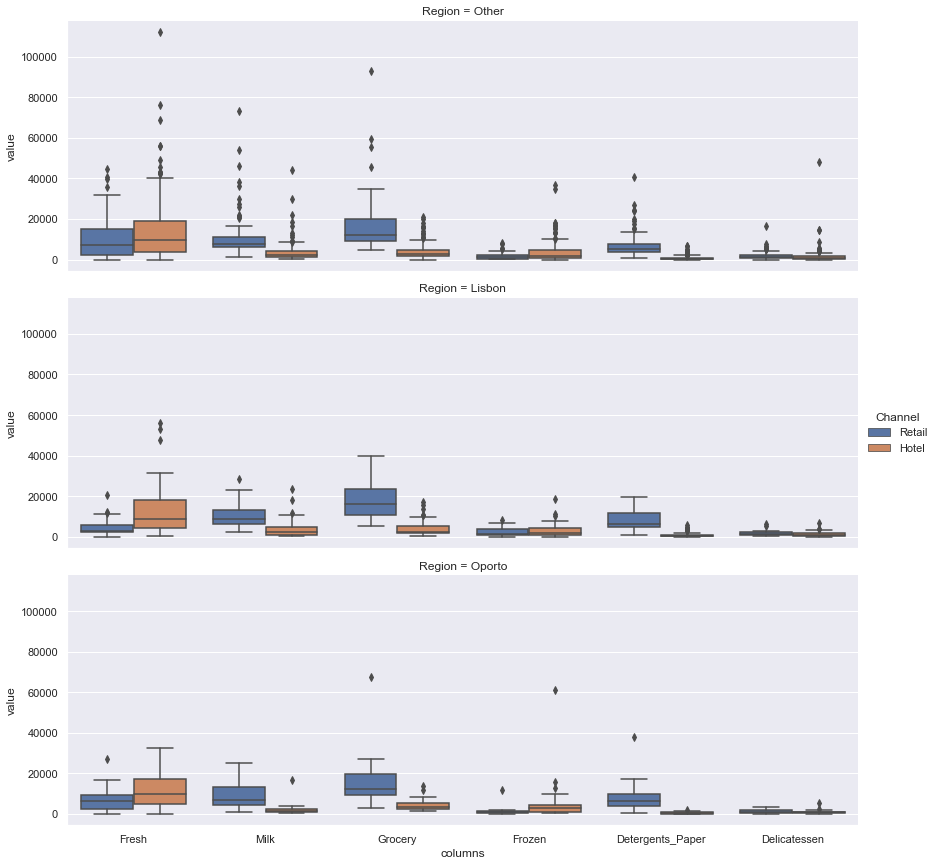

In [17]:
sns.catplot(x="columns",
               y = "value",
               hue="Channel", 
               row="Region", 
               data=adf_melt, 
               kind="box",
               height=4, 
               aspect=3);

## From The above graph we can find out the product varieties shows almost similar behaviour across diffrent Regions and Channels.


# 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

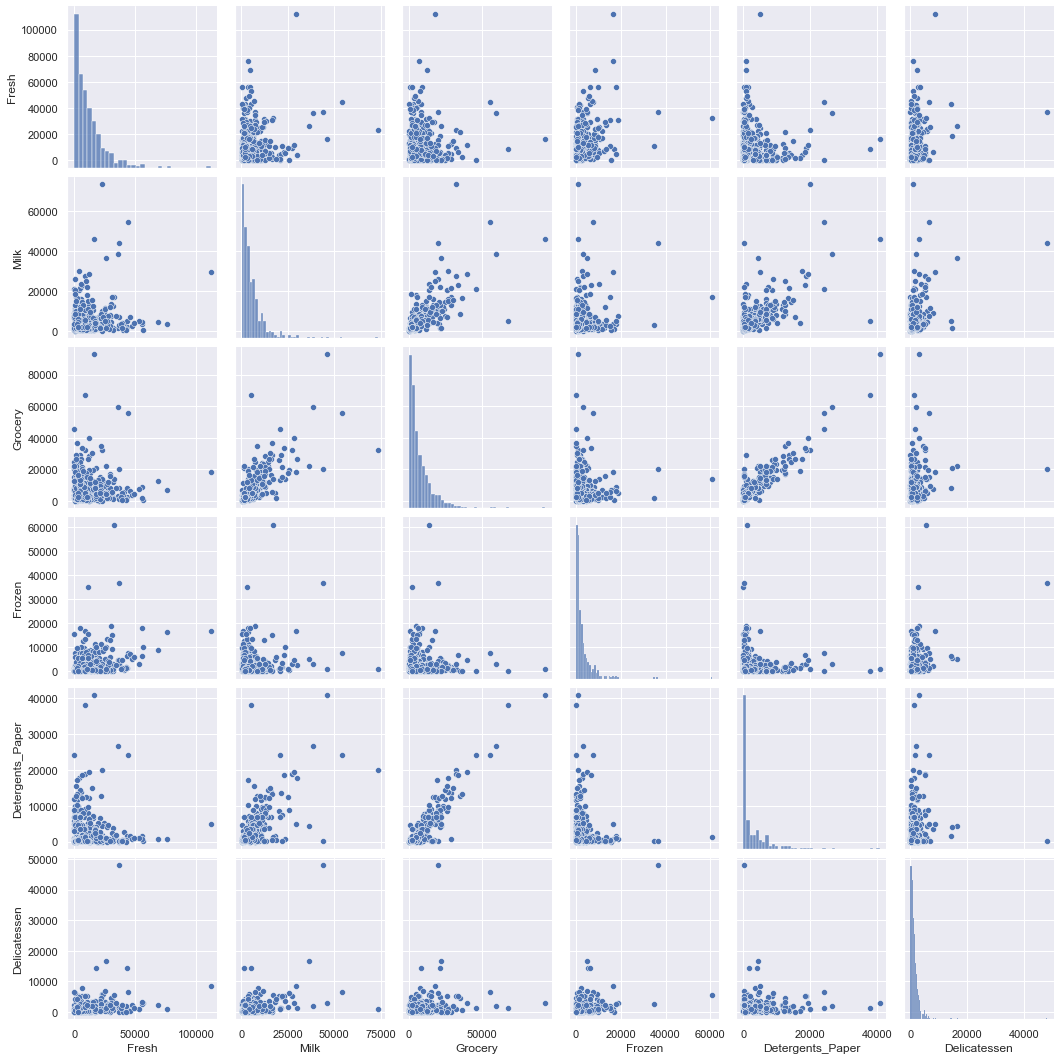

In [18]:
sns.pairplot(adf)

In [19]:
sd=adf.std()
sddf=sd.to_frame()
sddf=sddf.rename (columns={0:"standard_devation "})
sddf['mean'] = adf.mean()

sddf

,standard_devation,mean
Fresh,12647.328865,12000.297727
Milk,7380.377175,5796.265909
Grocery,9503.162829,7951.277273
Frozen,4854.673333,3071.931818
Detergents_Paper,4767.854448,2881.493182
Delicatessen,2820.105937,1524.870455


<AxesSubplot:title={'center':'Average and std of products '}>

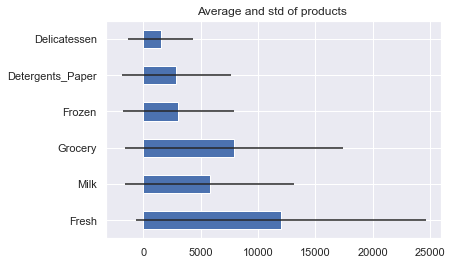

In [20]:
sddf.plot(kind = "barh", y = "mean", legend = False, title = "Average and std of products ", xerr = "standard_devation ")

## A high standard deviation shows that the data is widely spread and a low standard deviation shows that the data are clustered closely around the mean.

## Based on the above analysis Fresh variety has most inconsistent behiviour and Delicateseen has least inconsistent behiviour.

# 1.4 Are there any outliers in the data? 

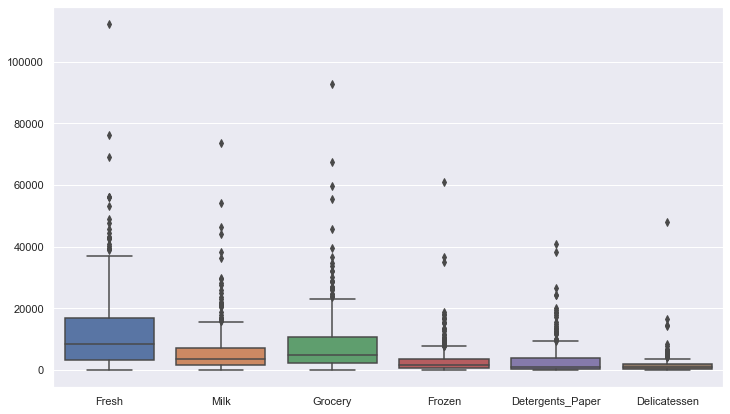

In [21]:
plt.figure(figsize=(12,7))
bx=sns.boxplot(data=adf)

## Yes there are outliners in the data. From the above analysis we can find that all the 6 products have outliers.

# 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem?

## Based on a channel and region anlysis . The recommedation would be to the wholesale distributor is to improve the sales in Oporto and Lisbo region.

## Based on the product analysis , we can find out that Fresh and Frozen products are sold more to the Hotels and Grocery and milk are sold more to the retail channel .So The distributor may use this information to optimise their marketing techniques and it may boost the sales.

## Based on the reginal behiviour analysis , The show simliar behivour on the all the region . ButThere are more outlier in the Other region than in the Oporto and Lisbo region. Require further data collection and analysis on these outlier to find the reason.

## Based on the outlier analysis on the products , all products have outliers . But Fresh items has a extreme Outlier.

# Problem 2 


In [22]:
df2.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [23]:
df2.describe()

,ID,Age,GPA,Salary,Social Networking,Satisfaction,Spending,Text Messages
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,31.500000,21.129032,3.129032,48.548387,1.516129,3.741935,482.016129,246.209677
std,18.041619,1.431311,0.377388,12.080912,0.844305,1.213793,221.953805,214.465950
min,1.000000,18.000000,2.300000,25.000000,0.000000,1.000000,100.000000,0.000000
25%,16.250000,20.000000,2.900000,40.000000,1.000000,3.000000,312.500000,100.000000
50%,31.500000,21.000000,3.150000,50.000000,1.000000,4.000000,500.000000,200.000000
75%,46.750000,22.000000,3.400000,55.000000,2.000000,4.000000,600.000000,300.000000
max,62.000000,26.000000,3.900000,80.000000,4.000000,6.000000,1400.000000,900.000000


In [24]:
df2.isnull().values.any()

False

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 62 non-null     int64  
 1   Gender             62 non-null     object 
 2   Age                62 non-null     int64  
 3   Class              62 non-null     object 
 4   Major              62 non-null     object 
 5   Grad Intention     62 non-null     object 
 6   GPA                62 non-null     float64
 7   Employment         62 non-null     object 
 8   Salary             62 non-null     float64
 9   Social Networking  62 non-null     int64  
 10  Satisfaction       62 non-null     int64  
 11  Spending           62 non-null     int64  
 12  Computer           62 non-null     object 
 13  Text Messages      62 non-null     int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 6.9+ KB


## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)
### 2.1.1. Gender and Major

In [26]:
gm=pd.crosstab(df2["Gender"],df2["Major"],margins=True)
gm

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


### 2.1.2. Gender and Grad Intention

In [27]:
ggi=pd.crosstab(df2["Gender"],df2["Grad Intention"],margins=True)
ggi

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


### 2.1.3. Gender and Employment

In [28]:
ge=pd.crosstab(df2["Gender"],df2["Employment"],margins=True)
ge

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


### 2.1.4. Gender and Computer

In [29]:
gc=pd.crosstab(df2["Gender"],df2["Computer"],margins=True)
gc

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [30]:
print("\033[1m" +' The probability that a randomly selected CMSU student will be male  = 29/62 =', 29/62 ,'ie', round((29/62)*100), '%' )

 The probability that a randomly selected CMSU student will be male  = 29/62 = 0.46774193548387094 ie 47 %


### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [31]:
print("\033[1m" +' The probability that a randomly selected CMSU student will be female =33/62 = ', 33/62 ,'ie', round((33/62)*100), '% ' )

 The probability that a randomly selected CMSU student will be female =33/62 =  0.532258064516129 ie 53 % 


## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [32]:
gm

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [33]:
print ("\033[1m" +'probability of of having Accounting as a  major among the male students in CMSU is 4/29 =              ', 4/29 ,'ie', round((4/29)*100) ,'%')
print ("\033[1m" +'probability of of having CIS as a  major among the male students in CMSU is  1/29 =                    ', 1/29 , 'ie', round((1/29)*100) ,'%'  )
print ("\033[1m" +'probability of of having Economics/Finance as a  major among the male students in CMSU is 4/29 =       ', 4/29, 'ie', round((4/29)*100) ,'%')
print ("\033[1m" +'probability of of having International Business as a  major among the male students in CMSU is 2/29 =  ', 2/29 ,'ie', round((2/29)*100) , '%' )
print ("\033[1m" +'probability of of having Management as a  major among the male students in CMSU is  6/29 =             ', 6/29 ,'ie', round((6/29)*100) , '%')
print ("\033[1m" +'probability of of having Other as a  major among the male students in CMSU is  4/29 =                  ', 4/29 , 'ie', round((4/29)*100) ,'%' )
print ("\033[1m" +'probability of of having Retail/Marketing  as a  major among the male students in CMSU is 5/29=         ',5/29 , 'ie', round((5/29)*100) ,'%' )
print ("\033[1m" +'probability of of having Undecided major among the male students in CMSU is 3/29  =                    ', 3/29 , 'ie', round((3/29)*100) ,'%' )

probability of of having Accounting as a  major among the male students in CMSU is 4/29 =               0.13793103448275862 ie 14 %
probability of of having CIS as a  major among the male students in CMSU is  1/29 =                     0.034482758620689655 ie 3 %
probability of of having Economics/Finance as a  major among the male students in CMSU is 4/29 =        0.13793103448275862 ie 14 %
probability of of having International Business as a  major among the male students in CMSU is 2/29 =   0.06896551724137931 ie 7 %
probability of of having Management as a  major among the male students in CMSU is  6/29 =              0.20689655172413793 ie 21 %
probability of of having Other as a  major among the male students in CMSU is  4/29 =                   0.13793103448275862 ie 14 %
probability of of having Retail/Marketing  as a  major among the male students in CMSU is 5/29=          0.1724137931034483 ie 17 %
probability of of having Undecided major among the male students in CMSU is 3

### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [34]:
print ("\033[1m" +'probability of of having Accounting as a  major among the female students in CMSU is 3/33=              ',  3/33    ,'ie', round((3/33)*100) ,'%')
print ("\033[1m" +'probability of of having CIS as a  major among the female students in CMSU is 3/33 =                    ',  3/33    ,'ie', round((3/33)*100) ,'%'  )
print ("\033[1m" +'probability of of having Economics/Finance as a  major among the female students in CMSU is 7/33=       ',  7/33    ,'ie', round((7/33)*100) ,'%')
print ("\033[1m" +'probability of of having International Business as a  major among the female students in CMSU is 4/33 = ',  4/33    ,'ie', round((4/33)*100) , '%' )
print ("\033[1m" +'probability of of having Management as a  major among the female students in CMSU is  4/33 =            ',  4/33    ,'ie', round((4/33)*100) , '%')
print ("\033[1m" +'probability of of having Other as a  major among the female students in CMSU is  3/33 =                 ',  3/33    ,'ie', round((3/33)*100) ,'%' )
print ("\033[1m" +'probability of of having Retail/Marketing  as a  major among the female students in CMSU is 9/33 =      ' , 9/33    ,'ie', round((9/33)*100) ,'%' )
print ("\033[1m" +'probability of of having Undecided major among the female students in CMSU is 0/33=                     ',  0/33    ,'ie', round((0/33)*100) ,'%' )

probability of of having Accounting as a  major among the female students in CMSU is 3/33=               0.09090909090909091 ie 9 %
probability of of having CIS as a  major among the female students in CMSU is 3/33 =                     0.09090909090909091 ie 9 %
probability of of having Economics/Finance as a  major among the female students in CMSU is 7/33=        0.21212121212121213 ie 21 %
probability of of having International Business as a  major among the female students in CMSU is 4/33 =  0.12121212121212122 ie 12 %
probability of of having Management as a  major among the female students in CMSU is  4/33 =             0.12121212121212122 ie 12 %
probability of of having Other as a  major among the female students in CMSU is  3/33 =                  0.09090909090909091 ie 9 %
probability of of having Retail/Marketing  as a  major among the female students in CMSU is 9/33 =       0.2727272727272727 ie 27 %
probability of of having Undecided major among the female students in CMS

## 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [35]:
ggi

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


In [36]:

print ("\033[1m" +'probability of intent to graduate, given that the student is a male is 17/33 =  ', 17/33 ,'ie', round((17/33)*100) ,'%')

probability of intent to graduate, given that the student is a male is 17/33 =   0.5151515151515151 ie 52 %


### Find the probability That a randomly chosen student is a female and intends to graduate.

In [37]:
print ("\033[1m" +'probability of intent to graduate, given that the student is a female is 11/33 = ', 11/33 ,'ie', round((11/33)*100) ,'%')

probability of intent to graduate, given that the student is a female is 11/33 =  0.3333333333333333 ie 33 %


### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop. 

In [38]:
gc

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


In [39]:
print ("\033[1m" +' probability of students are female and doesnot prefer a laptop  is (1-29)/33 ', 1-29/33 ,'ie', round((1-29/33)*100) ,'%')

 probability of students are female and doesnot prefer a laptop  is (1-29)/33  0.12121212121212122 ie 12 %


## 2.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.5.1. Find the probability that a randomly chosen student is either a male or has full-time employment?

In [40]:
ge

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


In [41]:
print ("\033[1m" +'probability that a randomly chosen student is either a male or has full-time employment is 29/62+3/62 =                                        ', (29/62)+(3/62) ,'ie', round(((29/62 )+(3/62))*100) ,'%')

probability that a randomly chosen student is either a male or has full-time employment is 29/62+3/62 =                                         0.5161290322580645 ie 52 %


### 2.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [42]:
gm

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [43]:
print ("\033[1m" +'probability that given a female student is randomly chosen, she is majoring in international business or management is 4/33 + 4/33 =   ', 8/33 ,'ie', round((8/33)*100) ,'%')

probability that given a female student is randomly chosen, she is majoring in international business or management is 4/33 + 4/33 =    0.24242424242424243 ie 24 %


### 2.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [44]:
print("gender and Grad Intention")
ggi2 =pd.crosstab(df2["Gender"],df2["Grad Intention"], margins=False)
ggi2 =ggi2.drop(['Undecided'],axis=1)
ggi2

gender and Grad Intention


Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


### If Statistic >= Critical Value: significant result, reject null hypothesis ( accept Ha), dependent
### Statistic < Critical Value: not significant result, fail to reject null hypothesis (aceept H0), independent

In [45]:
print( "gender vs grad Intention  ")
stat, p, dof, expected = chi2_contingency(ggi2)
print('dof=%d' % dof)
print(expected)


prob = 0.95 
critical = chi2.ppf(prob, dof)
print("critical=",critical)
print ("Stat=", stat)
if abs(stat) >= critical:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

gender vs grad Intention  
dof=1
[[ 6. 14.]
 [ 6. 14.]]
critical= 3.841458820694124
Stat= 2.9761904761904767
Independent (fail to reject H0)


## 2.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages.

### 2.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [46]:
print("gender and GPA")
gpa1 =pd.crosstab(df2["Gender"],df2["GPA"],margins=False)
gpa1

gender and GPA


GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9
Gender,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0


In [47]:
print ("\033[1m" +'probability that a randomly chosen student is having GPA less than 3 is 1-(45/62) =          ', (1- (45/62)) ,'ie', round((1-(45/62) )*100) ,'%')

probability that a randomly chosen student is having GPA less than 3 is 1-(45/62) =           0.27419354838709675 ie 27 %


### 2.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [48]:
print ("\033[1m" +' probability of a randomly selected male earns 50 or more is 14/29 =  ', 14/29 ,'ie', round((14/29)*100) ,'%')

 probability of a randomly selected male earns 50 or more is 14/29 =   0.4827586206896552 ie 48 %


In [49]:
print ("\033[1m" +' probability of a randomly selected female earns 50 or more is 18/33 =  ', 18/33 ,'ie', round((18/33)*100) ,'%')

 probability of a randomly selected female earns 50 or more is 18/33 =   0.5454545454545454 ie 55 %


### 2.8 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions for this whole Problem 2.

### H0 = Distribution is normal
### Ha = Distribution is not normal

### p <= alpha: reject H0, 
### p > alpha: fail to reject H0, 


In [50]:

alpha = 0.05
print ("alpha =", alpha) 

alpha = 0.05


## GPA

In [51]:
stat, p = normaltest(df2['GPA'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

if p > alpha:
      print('We have enough evidence that distribution is normal (fail to reject H0)')
else:
    print('We have enough evidence that distribution is not normal (p< alpha reject H0)')

Statistics=1.953, p=0.377
We have enough evidence that distribution is normal (fail to reject H0)


Histogram (distrubution plot for varaible GPA  )


C:\Users\ZE73\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GPA', ylabel='Density'>

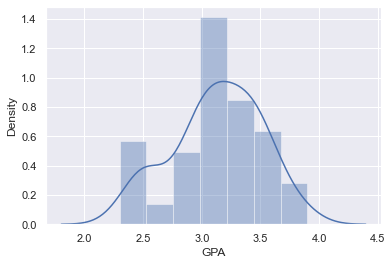

In [52]:
print("Histogram (distrubution plot for varaible GPA  )")
sns.distplot(df2['GPA'])

### Salary

In [53]:
stat, p = normaltest(df2['Salary'])

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('We have enough evidence that distribution is normal (fail to reject H0)')
else:
    print('We have enough evidence that distribution is not normal (p< alpha reject H0)')

Statistics=3.846, p=0.146
We have enough evidence that distribution is normal (fail to reject H0)


Histogram (distrubution plot for varaible Salary  )


C:\Users\ZE73\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

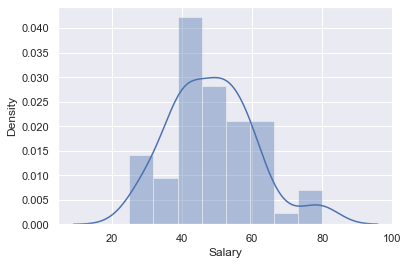

In [54]:
print("Histogram (distrubution plot for varaible Salary  )")
sns.distplot(df2['Salary'])

### Spending

In [55]:
stat, p = normaltest(df2['Spending'])

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('We have enough evidence that distribution is normal (fail to reject H0)')
else:
    print('We have enough evidence that distribution is not normal (p< alpha reject H0)')

Statistics=30.496, p=0.000
We have enough evidence that distribution is not normal (p< alpha reject H0)


Histogram (distrubution plot for varaible Spending  )


C:\Users\ZE73\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


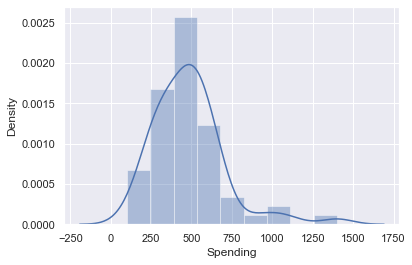

In [56]:
print("Histogram (distrubution plot for varaible Spending  )")
sns.distplot(df2['Spending'])
plt.show()

### Text Messages

In [57]:
stat, p = normaltest(df2['Text Messages'])

print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('We have enough evidence that distribution is normal (fail to reject H0)')
else:
    print('We have enough evidence that distribution is not normal (p< alpha reject H0)')

Statistics=16.348, p=0.000
We have enough evidence that distribution is not normal (p< alpha reject H0)


Histogram (distrubution plot for varaible Text Messages  )


C:\Users\ZE73\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Text Messages', ylabel='Density'>

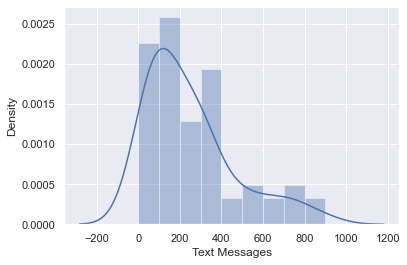

In [58]:
print("Histogram (distrubution plot for varaible Text Messages  )")
sns.distplot(df2['Text Messages'])

## From the above analysis , we can find that text messages and spending do not follow normal distribution but Salary and GPA follows normal distribution.

## Problem 3

### 3.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits?



In [59]:
df3.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


### Ho = Mean moisture contents of A and B are not with in limits
### Ha = Mean moisture contents of A and B are with in limits

In [60]:
t_statistic,p_value = ttest_ind(df3['A'],df3.dropna()['B'])
print(t_statistic,p_value)

1.289628271966112 0.2017496571835328


### Alpha = 0.35 is given

In [61]:
alpha = 0.35

In [62]:
 if p_value < alpha:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the  mean moisture content of A and B are with in limits')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis (p > alpha)')
    print('We conclude that the  mean moisture content of A and B are not with in limits.')

We have enough evidence to reject the null hypothesis in favour of alternative hypothesis
We conclude that the  mean moisture content of A and B are with in limits


### 3.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

### Hypothesis
#### H0 :S1 = s2
#### H1: S1 is not equal to S2

In [63]:
alpha= 0.05
print("alpha =", alpha)

alpha = 0.05


In [64]:
print('tstat',t_statistic)    
print('P Value',p_value)

if p_value < alpha:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis')
    print('We conclude that the  means for shingles A and B are  not equal .')
else:
    print('We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis (p > alpha)')
    print('We conclude that the  means for shingles A and B are equal.')

tstat 1.289628271966112
P Value 0.2017496571835328
We do not have enough evidence to reject the null hypothesis in favour of alternative hypothesis (p > alpha)
We conclude that the  means for shingles A and B are equal.


### For the above test (T Test ) , we must assume that both the samples are normally distributed and samples are random. We also assumed unequal variances of the populations as variance of population is unknown 

Thank you :)